# eWRC Rally Console

Simple notebook for generating eWRC results and charts.

In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
from rallyview_charts import *

In [45]:
rally_stub = '60140-rally-sweden-2020'
ewrc = EWRC(rally_stub, live=True)

In [46]:
ewrc.get_entry_list()

import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import Image

classes = widgets.Dropdown(
    #Omit car 0
    options=['All']+ewrc.df_entry_list[ewrc.df_entry_list['CarNum']!='#0']['Class'].dropna().unique().tolist(),
    value='All', description='Class:', disabled=False )


carNum = widgets.Dropdown(
    options=ewrc.carsInClass(classes.value),
    description='Car:', disabled=False)

def update_drivers(*args):
    carlist = ewrc.carsInClass(classes.value)
    carNum.options = carlist
    
classes.observe(update_drivers, 'value')

In [47]:
ewrc.df_stages

In [48]:
from ipywidgets import fixed
interact(rally_report2, ewrc=fixed(ewrc), cl=classes, carNum=carNum);

interactive(children=(Dropdown(description='Class:', options=('All', 'RC1', 'RC2', 'RC4', 'NAT4'), value='All'…

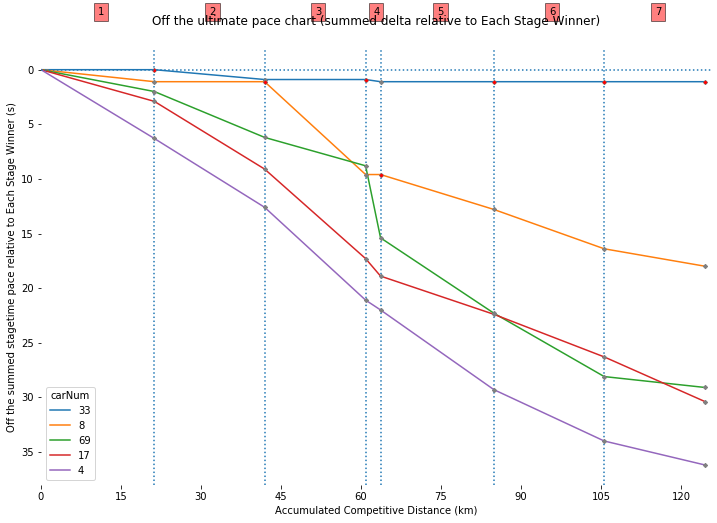

In [49]:
off_the_pace_chart(ewrc, filename='testpng/offpace.png');

In [51]:
paceReport(ewrc).head(10)

ValueError: Unable to coerce to Series, length must be 7: given 9

In [ ]:
tanak = '/entryinfo/60140-rally-sweden-2020/2494761/'

pace_map(ewrc, PACEMAX=2, stretch=True, rally_class='RC1',
         rebase=tanak, filename='testpng/pacemap.png');